In [1]:
# If running in Google Colab, mount drive
print('Check if running in Colab...')
try:
    from google.colab import drive
    print('Running in Colab!')
    drive.mount('/content/drive')
    %cd '/content/drive/My Drive/CIL-FS20'
except ImportError:
    print('Running locally!')

    #Check python version
    from platform import python_version
    print('Current python version: {}'.format(python_version()))

    # Check available GPUs
    import tensorflow as tf
    no_GPUs_available = len(tf.config.experimental.list_physical_devices('GPU'))
    print("Number of GPUs Available: {}".format(no_GPUs_available))

Check if running in Colab...
Running locally!
Current python version: 3.7.5
Number of GPUs Available: 1


In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D, Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.merge import concatenate
from keras import optimizers
from keras.layers import BatchNormalization
from tensorflow.keras.metrics import MeanIoU
from keras import backend as K
from keras.backend import binary_crossentropy
import keras
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from datetime import datetime

from mask_to_submission import masks_to_submission
import util

## Install the following packages
import imageio
from PIL import Image
import cv2
import natsort

Using TensorFlow backend.


## Constants

In [3]:
# Name of the current model
MODEL_NAME = 'fullyCNN_datagenerator_fixed_more_data'
IMG_WIDTH = 608
IMG_HEIGHT = 608
EPOCHS = 100
STEPS_PER_EPOCH = 500
LEARNING_RATE = 0.0001
BATCH_SIZE = 8
rnd_seed = 4
np.random.seed(rnd_seed)

## Load Images

In [4]:
training_image_dir = "training_images/images/"
training_label_dir = "training_images/groundtruth/"
test_image_dir = "test_images/"

files_image = os.listdir(training_image_dir)
files_image = natsort.natsorted(files_image)
files_label = os.listdir(training_label_dir)
files_label = natsort.natsorted(files_label)
files_test = os.listdir(test_image_dir)
files_test = natsort.natsorted(files_test)
n = len(files_image)
n_test = len(files_test) 

# Load list of numpy arrays of training images and labels
print("Loading " + str(n) + " training images")
training_image_list = []
training_label_list = []
for i in range(n):
    print("Loading training image {:04d}\r".format(i)),
    training_image_list.append(imageio.imread(training_image_dir + files_image[i], pilmode="RGB"))
    training_label_list.append(imageio.imread(training_label_dir + files_label[i], pilmode="L"))

# Load list of numpy arrays of test images
print("Loading " + str(n_test) + " test images")
test_image_list = [imageio.imread(test_image_dir + files_test[i]) for i in range(n_test)]

print("TRAINING:")
print(training_image_list[0].shape)
print(training_label_list[0].shape)
print("TEST:")
print(test_image_list[0].shape)

Loading 2511 training images
Loading training image 0000
Loading training image 0001
Loading training image 0002
Loading training image 0003
Loading training image 0004
Loading training image 0005
Loading training image 0006
Loading training image 0007
Loading training image 0008
Loading training image 0009
Loading training image 0010
Loading training image 0011
Loading training image 0012
Loading training image 0013
Loading training image 0014
Loading training image 0015
Loading training image 0016
Loading training image 0017
Loading training image 0018
Loading training image 0019
Loading training image 0020
Loading training image 0021
Loading training image 0022
Loading training image 0023
Loading training image 0024
Loading training image 0025
Loading training image 0026
Loading training image 0027
Loading training image 0028
Loading training image 0029
Loading training image 0030
Loading training image 0031
Loading training image 0032
Loading training image 0033
Loading training im

Loading training image 0315
Loading training image 0316
Loading training image 0317
Loading training image 0318
Loading training image 0319
Loading training image 0320
Loading training image 0321
Loading training image 0322
Loading training image 0323
Loading training image 0324
Loading training image 0325
Loading training image 0326
Loading training image 0327
Loading training image 0328
Loading training image 0329
Loading training image 0330
Loading training image 0331
Loading training image 0332
Loading training image 0333
Loading training image 0334
Loading training image 0335
Loading training image 0336
Loading training image 0337
Loading training image 0338
Loading training image 0339
Loading training image 0340
Loading training image 0341
Loading training image 0342
Loading training image 0343
Loading training image 0344
Loading training image 0345
Loading training image 0346
Loading training image 0347
Loading training image 0348
Loading training image 0349
Loading training ima

Loading training image 0644
Loading training image 0645
Loading training image 0646
Loading training image 0647
Loading training image 0648
Loading training image 0649
Loading training image 0650
Loading training image 0651
Loading training image 0652
Loading training image 0653
Loading training image 0654
Loading training image 0655
Loading training image 0656
Loading training image 0657
Loading training image 0658
Loading training image 0659
Loading training image 0660
Loading training image 0661
Loading training image 0662
Loading training image 0663
Loading training image 0664
Loading training image 0665
Loading training image 0666
Loading training image 0667
Loading training image 0668
Loading training image 0669
Loading training image 0670
Loading training image 0671
Loading training image 0672
Loading training image 0673
Loading training image 0674
Loading training image 0675
Loading training image 0676
Loading training image 0677
Loading training image 0678
Loading training ima

Loading training image 0968
Loading training image 0969
Loading training image 0970
Loading training image 0971
Loading training image 0972
Loading training image 0973
Loading training image 0974
Loading training image 0975
Loading training image 0976
Loading training image 0977
Loading training image 0978
Loading training image 0979
Loading training image 0980
Loading training image 0981
Loading training image 0982
Loading training image 0983
Loading training image 0984
Loading training image 0985
Loading training image 0986
Loading training image 0987
Loading training image 0988
Loading training image 0989
Loading training image 0990
Loading training image 0991
Loading training image 0992
Loading training image 0993
Loading training image 0994
Loading training image 0995
Loading training image 0996
Loading training image 0997
Loading training image 0998
Loading training image 0999
Loading training image 1000
Loading training image 1001
Loading training image 1002
Loading training ima

Loading training image 1284
Loading training image 1285
Loading training image 1286
Loading training image 1287
Loading training image 1288
Loading training image 1289
Loading training image 1290
Loading training image 1291
Loading training image 1292
Loading training image 1293
Loading training image 1294
Loading training image 1295
Loading training image 1296
Loading training image 1297
Loading training image 1298
Loading training image 1299
Loading training image 1300
Loading training image 1301
Loading training image 1302
Loading training image 1303
Loading training image 1304
Loading training image 1305
Loading training image 1306
Loading training image 1307
Loading training image 1308
Loading training image 1309
Loading training image 1310
Loading training image 1311
Loading training image 1312
Loading training image 1313
Loading training image 1314
Loading training image 1315
Loading training image 1316
Loading training image 1317
Loading training image 1318
Loading training ima

Loading training image 1584
Loading training image 1585
Loading training image 1586
Loading training image 1587
Loading training image 1588
Loading training image 1589
Loading training image 1590
Loading training image 1591
Loading training image 1592
Loading training image 1593
Loading training image 1594
Loading training image 1595
Loading training image 1596
Loading training image 1597
Loading training image 1598
Loading training image 1599
Loading training image 1600
Loading training image 1601
Loading training image 1602
Loading training image 1603
Loading training image 1604
Loading training image 1605
Loading training image 1606
Loading training image 1607
Loading training image 1608
Loading training image 1609
Loading training image 1610
Loading training image 1611
Loading training image 1612
Loading training image 1613
Loading training image 1614
Loading training image 1615
Loading training image 1616
Loading training image 1617
Loading training image 1618
Loading training ima

Loading training image 1889
Loading training image 1890
Loading training image 1891
Loading training image 1892
Loading training image 1893
Loading training image 1894
Loading training image 1895
Loading training image 1896
Loading training image 1897
Loading training image 1898
Loading training image 1899
Loading training image 1900
Loading training image 1901
Loading training image 1902
Loading training image 1903
Loading training image 1904
Loading training image 1905
Loading training image 1906
Loading training image 1907
Loading training image 1908
Loading training image 1909
Loading training image 1910
Loading training image 1911
Loading training image 1912
Loading training image 1913
Loading training image 1914
Loading training image 1915
Loading training image 1916
Loading training image 1917
Loading training image 1918
Loading training image 1919
Loading training image 1920
Loading training image 1921
Loading training image 1922
Loading training image 1923
Loading training ima

Loading training image 2196
Loading training image 2197
Loading training image 2198
Loading training image 2199
Loading training image 2200
Loading training image 2201
Loading training image 2202
Loading training image 2203
Loading training image 2204
Loading training image 2205
Loading training image 2206
Loading training image 2207
Loading training image 2208
Loading training image 2209
Loading training image 2210
Loading training image 2211
Loading training image 2212
Loading training image 2213
Loading training image 2214
Loading training image 2215
Loading training image 2216
Loading training image 2217
Loading training image 2218
Loading training image 2219
Loading training image 2220
Loading training image 2221
Loading training image 2222
Loading training image 2223
Loading training image 2224
Loading training image 2225
Loading training image 2226
Loading training image 2227
Loading training image 2228
Loading training image 2229
Loading training image 2230
Loading training ima

Loading training image 2499
Loading training image 2500
Loading training image 2501
Loading training image 2502
Loading training image 2503
Loading training image 2504
Loading training image 2505
Loading training image 2506
Loading training image 2507
Loading training image 2508
Loading training image 2509
Loading training image 2510
Loading 94 test images
TRAINING:
(608, 608, 3)
(608, 608)
TEST:
(608, 608, 3)


## Padd Images
Training images have size 400x400 and test images have size 608x608. So we need to pad training images to same size, 
for that I use mirror padding for now.

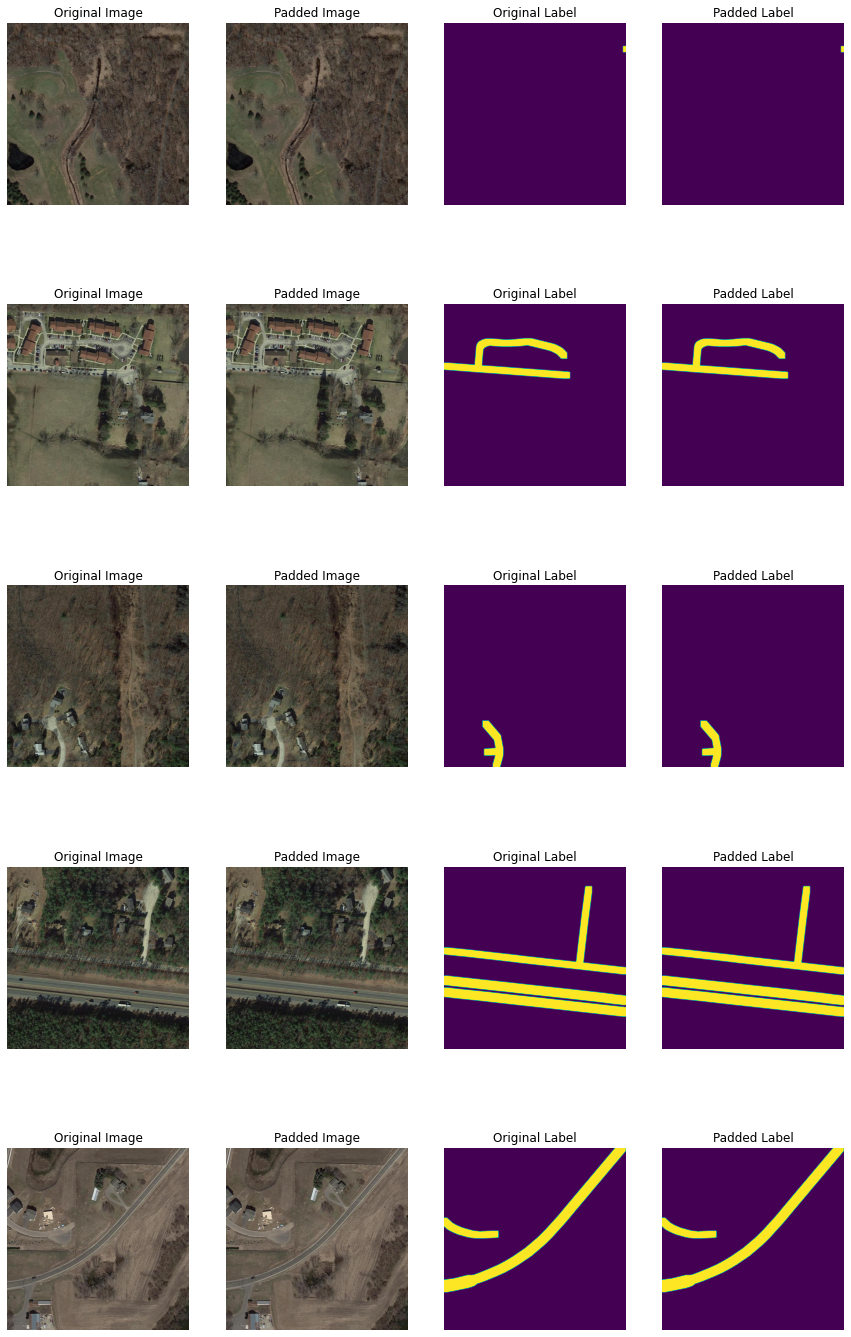

(2511, 608, 608, 3)
(2511, 608, 608, 1)


In [5]:
# Mirror padd all training images to get same size as test images
training_image_padded_list = []
training_label_padded_list = []
for i in range(n):
    training_image = training_image_list[i]
    training_label = training_label_list[i]
    height, width, _ = training_image.shape
    pad_y = int((IMG_HEIGHT - height) / 2)
    pad_x = int((IMG_WIDTH - height) / 2)
    training_image_padded_list.append(cv2.copyMakeBorder(training_image,pad_y,pad_y,pad_x,pad_x,cv2.BORDER_REFLECT))
    training_label_padded_list.append(cv2.copyMakeBorder(training_label,pad_y,pad_y,pad_x,pad_x,cv2.BORDER_REFLECT))

# Plot random Sample of images
index = random.randint(0, n-1)
num_samples = 5

f = plt.figure(figsize = (15, 25))
for i in range(1, num_samples*4, 4):
  index = random.randint(0, n-1)

  f.add_subplot(num_samples, 4, i)
  plt.imshow(training_image_list[index])
  plt.title("Original Image")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+1)
  plt.imshow(training_image_padded_list[index])
  plt.title("Padded Image")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+2)
  plt.imshow(np.squeeze(training_label_list[index]))
  plt.title("Original Label")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+3)
  plt.imshow(np.squeeze(training_label_padded_list[index]))
  plt.title("Padded Label")
  plt.axis('off')

plt.show()

# Convert image lists to numpy arrays for further processing
training_image = np.array(training_image_padded_list)
training_label = np.expand_dims(np.array(training_label_padded_list), -1)
test_image = np.array(test_image_list)
print(training_image.shape)
print(training_label.shape)

# Delete unused variables, hopefully this frees up some RAM
del training_image_list
del training_label_list
del training_image_padded_list
del training_label_padded_list

In [6]:
# Make sure label masks only have values 1 or zero
#thresh_val = 0.5
#training_label = (training_label > thresh_val).astype(np.uint8)
#training_label = training_label/255
training_label = training_label.astype(np.float32)
#print(np.unique(training_label, return_counts=True, axis=None))
print(training_label.dtype)

# Get a validation set
training_image, validation_image, training_label, validation_label = train_test_split(
    training_image, training_label, test_size=0.1, random_state=rnd_seed)

# Rescale validation images/labels and test images because generator will do the same with training data
validation_image = validation_image/255.0
validation_label = validation_label/255.0
validation_image = validation_image.astype(np.float32)
validation_label = validation_label.astype(np.float32)
print(validation_image.dtype)
test_image = test_image/255.0
test_image = test_image.astype(np.float32)
print(test_image.dtype)

float32
float32
float32


## Augment Training Data

We use the Keras Data Generator to augment our training data online while training. This is necessary because of memory consumption.

In [7]:
# We create an instance for the training images, training labels and test images
data_gen_args = dict(rescale=1.0/255.0,
                     #rotation_range=360,
                     #width_shift_range=0.05,
                     #height_shift_range=0.05,
                     #zoom_range=0.05,
                     #shear_range=0.05,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
image_generator = image_datagen.flow(
    training_image,
    batch_size=BATCH_SIZE,
    #save_to_dir="training_images_augmented/images/",
    #save_prefix="",
    #save_format="png",
    seed=seed)
mask_generator = mask_datagen.flow(
    training_label,
    batch_size=BATCH_SIZE,
    #save_to_dir="training_images_augmented/groundtruth/",
    #save_prefix="",
    #save_format="png",
    seed=seed)

# Combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

## Loss Function and Accuracy Metric
- Accuracy: Intersection of prediction to label image over Union
- Loss :
    - Dice Coef Loss (https://arxiv.org/pdf/1606.04797v1.pdf)
    - Soft Dice Loss (Measure of interleaving of prediction image and label image)
    - Jaccard Distance

Source: https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99

In [8]:
from keras import backend as K

def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

def soft_dice_coef(y_true, y_pred, smooth = 1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def soft_dice_loss(y_true, y_pred):
    return 1-soft_dice_coef(y_true, y_pred)

def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

def jaccard_coef(y_true, y_pred, smooth = 1e-12):
    intersection = K.sum(y_true * y_pred, axis=[0, 1, 2])
    sum_ = K.sum(y_true + y_pred, axis=[0, 1, 2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)

def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))

    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)

def combined_loss(y_true, y_pred):
    return -K.log(jaccard_coef(y_true, y_pred)) + binary_crossentropy(y_pred, y_true)

## Model: Fully CNN built in Keras

In [9]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, 3))

conv1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
conv1 = BatchNormalization() (conv1)
conv1 = Dropout(0.1) (conv1)
conv1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv1)
conv1 = BatchNormalization() (conv1)
pooling1 = MaxPooling2D((2, 2)) (conv1)

conv2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling1)
conv2 = BatchNormalization() (conv2)
conv2 = Dropout(0.1) (conv2)
conv2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv2)
conv2 = BatchNormalization() (conv2)
pooling2 = MaxPooling2D((2, 2)) (conv2)

conv3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling2)
conv3 = BatchNormalization() (conv3)
conv3 = Dropout(0.2) (conv3)
conv3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv3)
conv3 = BatchNormalization() (conv3)
pooling3 = MaxPooling2D((2, 2)) (conv3)

conv4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling3)
conv4 = BatchNormalization() (conv4)
conv4 = Dropout(0.2) (conv4)
conv4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv4)
conv4 = BatchNormalization() (conv4)
pooling4 = MaxPooling2D(pool_size=(2, 2)) (conv4)

conv5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling4)
conv5 = BatchNormalization() (conv5)
conv5 = Dropout(0.3) (conv5)
conv5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv5)
conv5 = BatchNormalization() (conv5)


upsample6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (conv5)
upsample6 = concatenate([upsample6, conv4])
conv6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample6)
conv6 = BatchNormalization() (conv6)
conv6 = Dropout(0.2) (conv6)
conv6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv6)
conv6 = BatchNormalization() (conv6)

upsample7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (conv6)
upsample7 = concatenate([upsample7, conv3])
conv7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample7)
conv7 = BatchNormalization() (conv7)
conv7 = Dropout(0.2) (conv7)
conv7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv7)
conv7 = BatchNormalization() (conv7)

upsample8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (conv7)
upsample8 = concatenate([upsample8, conv2])
conv8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample8)
conv8 = BatchNormalization() (conv8)
conv8 = Dropout(0.1) (conv8)
conv8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv8)
conv8 = BatchNormalization() (conv8)

upsample9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (conv8)
upsample9 = concatenate([upsample9, conv1], axis=3)
conv9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample9)
conv9 = BatchNormalization() (conv9)
conv9 = Dropout(0.1) (conv9)
conv9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv9)
conv9 = BatchNormalization() (conv9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv9)

model = Model(inputs=[inputs], outputs=[outputs])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 608, 608, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 608, 608, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 608, 608, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 608, 608, 16) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

## Callbacks for Observations

In [10]:
#tbc=TensorBoardColab()
model_path = "./Models/{}_model.h5".format(MODEL_NAME)
checkpointer = ModelCheckpoint(model_path,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
csv_logger = CSVLogger("./Logs/{}_log.csv".format(MODEL_NAME), separator=',', append=False)
lr_reducer = ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1,
                               patience=6,
                               verbose=1,
                               epsilon=1e-4)
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

/home/rmenta/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


## Model Training

In [11]:
opt = keras.optimizers.adam(LEARNING_RATE)
#opt = keras.optimizers.Nadam(lr=LEARNING_RATE)
model.compile(
      optimizer=opt,
      loss=dice_coef_loss,
      metrics=[iou_coef])

In [12]:
history = model.fit_generator(train_generator,
                              validation_data =(validation_image, validation_label),
                              steps_per_epoch=STEPS_PER_EPOCH,
                              epochs=EPOCHS,
                              callbacks = [checkpointer, csv_logger, lr_reducer, early_stopper])

Epoch 1/100
500/500 [==============================] - 451s 901ms/step - loss: 0.0833 - iou_coef: 0.2294 - val_loss: 0.0317 - val_iou_coef: 0.3026

Epoch 00001: val_loss improved from inf to 0.03167, saving model to ./Models/fullyCNN_datagenerator_fixed_more_data_model.h5
Epoch 2/100
500/500 [==============================] - 413s 825ms/step - loss: 0.0395 - iou_coef: 0.3105 - val_loss: 0.0241 - val_iou_coef: 0.3653

Epoch 00002: val_loss improved from 0.03167 to 0.02406, saving model to ./Models/fullyCNN_datagenerator_fixed_more_data_model.h5
Epoch 3/100
500/500 [==============================] - 434s 868ms/step - loss: 0.0288 - iou_coef: 0.3592 - val_loss: 0.0234 - val_iou_coef: 0.3697

Epoch 00003: val_loss improved from 0.02406 to 0.02342, saving model to ./Models/fullyCNN_datagenerator_fixed_more_data_model.h5
Epoch 4/100
500/500 [==============================] - 433s 866ms/step - loss: 0.0240 - iou_coef: 0.3857 - val_loss: 0.0201 - val_iou_coef: 0.3812

Epoch 00004: val_loss imp

KeyboardInterrupt: 

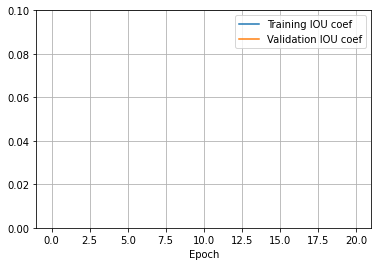

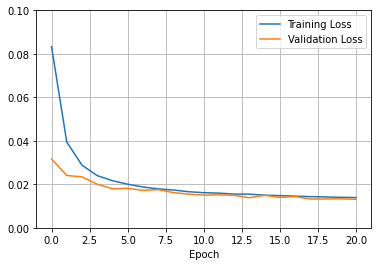

In [13]:
# Show a training report
training_info = pd.read_csv('./Logs/{}_log.csv'.format(MODEL_NAME), header=0)

acc1, = plt.plot(training_info['epoch'], training_info['iou_coef'])
acc2, = plt.plot(training_info['epoch'], training_info['val_iou_coef'])
plt.legend([acc1, acc2], ['Training IOU coef', 'Validation IOU coef'])
plt.xlabel('Epoch')
plt.ylim(0,0.1)
plt.grid(True)
plt.show()

loss1, = plt.plot(training_info['epoch'], training_info['loss'])
loss2, = plt.plot(training_info['epoch'], training_info['val_loss'])
plt.legend([acc1, acc2], ['Training Loss', 'Validation Loss'])                            
plt.xlabel('Epoch')
plt.ylim(0,0.1)
plt.grid(True)

plt.show()

## Model Evaluation

In [14]:
# Kaggle scores on validation images (mean score per image and overall mean score)
model = load_model("./Models/{}_model.h5".format(MODEL_NAME), custom_objects={'dice_coef_loss': dice_coef_loss, 'iou_coef': iou_coef})
y_pred = model.predict(validation_image, batch_size=4, verbose=1)
scores = util.validate_kaggle_score(validation_label, y_pred)
print(scores)
print(sum(scores)/len(scores))

252/252 [==============================] - 7s 28ms/step
[0.5342019543973942, 0.9074074074074073, 0.0, 0.8686868686868686, 0.9574468085106385, 0.03333333333333333, 0.9122807017543859, 0.8717948717948718, 0.8604651162790697, 0.8051948051948052, 0.8268156424581005, 0.9871244635193133, 0.9106918238993711, 0.8769230769230768, 0.880952380952381, 0.9111111111111111, 0.6153846153846154, 0.8391451068616423, 0.7875647668393784, 0.9775280898876404, 0.8942486085343229, 0.5142857142857143, 0.7826086956521738, 0.7733887733887733, 0.8863198458574182, 0.8709677419354839, 0.6820276497695852, 0.9074889867841409, 0.8682170542635658, 0.9490874159462055, 0.7445255474452555, 0.9733333333333334, 0.8816705336426915, 0.9330024813895781, 0.9320987654320988, 0.9426987060998151, 0.44827586206896547, 0.38016528925619836, 0.7777777777777778, 0.675257731958763, 0.8975609756097562, 0.688, 0.8491620111731844, 0.20588235294117646, 0.5576923076923077, 0.9363449691991785, 0.8717948717948718, 0.5396825396825397, 0.8899082

In [15]:
model = load_model("./Models/{}_model.h5".format(MODEL_NAME), custom_objects={'dice_coef_loss': dice_coef_loss, 'iou_coef': iou_coef})
#model.evaluate(test_images, test_label)
predictions = model.predict(test_image, batch_size=4, verbose=1)

94/94 [==============================] - 3s 36ms/step


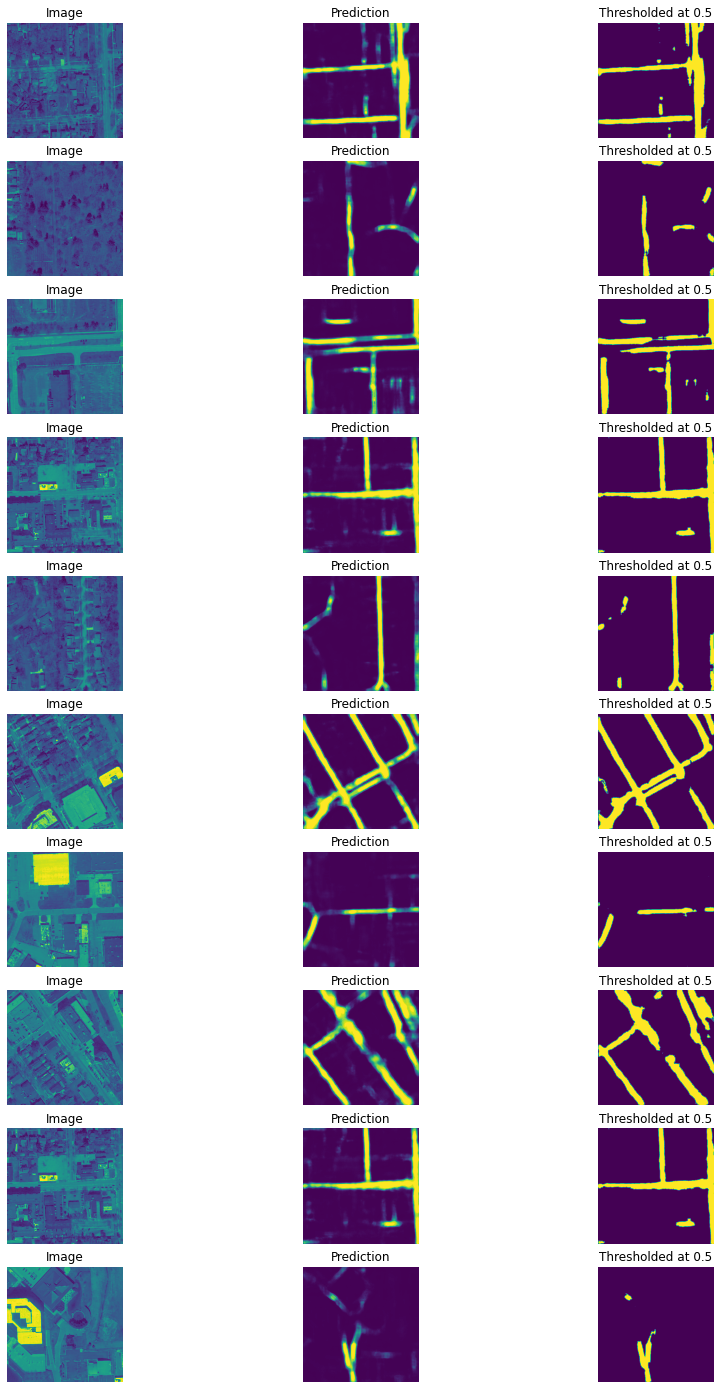

In [16]:
thresh_val = 0.5
predicton_threshold = (predictions > thresh_val).astype(np.uint8)

index = random.randint(0, len(predictions)-1)
num_samples = 10

f = plt.figure(figsize = (15, 25))
for i in range(1, num_samples*3, 3):
  index = random.randint(0, len(predictions)-1)

  f.add_subplot(num_samples, 3, i)
  plt.imshow(test_image[index][:,:,0])
  plt.title("Image")
  plt.axis('off')

  f.add_subplot(num_samples, 3, i+1)
  plt.imshow(np.squeeze(predictions[index][:,:,0]))
  plt.title("Prediction")
  plt.axis('off')

  f.add_subplot(num_samples, 3, i+2)
  plt.imshow(np.squeeze(predicton_threshold[index][:,:,0]))
  plt.title("Thresholded at {}".format(thresh_val))
  plt.axis('off')

plt.show()

## Create Submission File
Multiply image by 255 and convert to unit8 before storing s.t. it gets read out correctly by mask_to_submission!

In [17]:
predictions = np.squeeze(predictions*255)
predictions = predictions.astype(np.uint8)
result_dir = './Results/Prediction_Images/{}/'.format(MODEL_NAME)
os.makedirs(result_dir, exist_ok=True)

#print(predictions.shape)
#[print(predictions[i].shape) for i in range(n_test)]

[imageio.imwrite(result_dir + files_test[i], predictions[i],) for i in range(n_test)]
files_predictions = os.listdir(result_dir)
files_predictions = [result_dir + files_predictions[i] for i in range(n_test)]
masks_to_submission('./Results/Submissions/{}.csv'.format(MODEL_NAME), *files_predictions)
print('Submission ready')

./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_211.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_49.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_10.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_136.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_92.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_177.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_76.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_64.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_23.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_80.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_51.png
./Results/Prediction_Images/fullyCNN_datagenerator_fixed_more_data/test_9.png
./Results/Prediction_Images/fullyCNN_datagenerator